# Logistic Regression Model

## Data Import And Cleaning

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import recall_score, precision_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
import scripts.logistic_regression_functions as lrf

In [2]:
train_files = ['../../data/cleaned/utah_2017_vineyard.csv', 
               '../../data/cleaned/utah_2017_marina.csv',
               '../../data/cleaned/utah_2017_bird.csv']

test_files = ['../../data/cleaned/utah_2018_vineyard.csv', 
               '../../data/cleaned/utah_2018_marina.csv',
               '../../data/cleaned/utah_2018_bird.csv']

drop_columns = ['Time America/Boise UTC-06:00', 'Chlorophyll ug/L', 
                'Chlorophyll RFU', 'Wiper Pos V', 'Cable Pwr V', 'Battery V',
               'Date (mm.dd.yyyy)', 'Time 24hr', 'Chlorophyll (ug/L)', 
                'FDOM RFU']
x_columns = ['Temp C', 'Sp Cond (uS/cm)', 'pH (mV)', 'pH', 'Turbidity (NTU)',
            'ODOSat%', 'ODO (mg/L)']

RFU_THRESHOLD = 2

train_dfs = lrf.import_df_data(train_files, drop_columns)
test_dfs = lrf.import_df_data(test_files, drop_columns)

train_dfs[0].head()

,Temp C,Sp Cond (uS/cm),pH (mV),pH,Turbidity (NTU),ODOSat%,ODO (mg/L),BGA-Phycocyanin RFU
0,15.02,1848,-100.1,8.36,16.84,90.2,9.04,0.4
1,14.99,1847,-100.1,8.36,16.76,90.2,9.04,0.4
2,14.96,1847,-100.1,8.36,16.82,90.1,9.04,0.4
3,14.95,1848,-100.1,8.36,17.19,90.0,9.03,0.4
4,14.92,1848,-100.0,8.36,16.85,89.8,9.02,0.4


In [3]:
for df in train_dfs + test_dfs:
    print(df.columns)
    print(len(df.columns))

Index(['Temp C', 'Sp Cond (uS/cm)', 'pH (mV)', 'pH', 'Turbidity (NTU)',
       'ODOSat%', 'ODO (mg/L)', 'BGA-Phycocyanin RFU'],
      dtype='object')
8
Index(['Temp C', 'Sp Cond (uS/cm)', 'pH (mV)', 'pH', 'Turbidity (NTU)',
       'ODOSat%', 'ODO (mg/L)', 'BGA-Phycocyanin RFU'],
      dtype='object')
8
Index(['Temp C', 'Sp Cond (uS/cm)', 'pH (mV)', 'pH', 'Turbidity (NTU)',
       'ODOSat%', 'ODO (mg/L)', 'BGA-Phycocyanin RFU'],
      dtype='object')
8
Index(['Temperature C', 'Sp Cond uS/cm', 'pH mV', 'pH', 'Turbidity NTU',
       'ODOSat %', 'ODO mg/L', 'BGA-Phycocyanin RFU'],
      dtype='object')
8
Index(['Temperature C', 'Sp Cond uS/cm', 'pH mV', 'pH', 'Turbidity NTU',
       'ODOSat %', 'ODO mg/L', 'BGA-Phycocyanin RFU'],
      dtype='object')
8
Index(['Temperature C', 'Sp Cond uS/cm', 'pH mV', 'pH', 'Turbidity NTU',
       'ODOSat %', 'ODO mg/L', 'BGA-Phycocyanin RFU'],
      dtype='object')
8


In [4]:
# Rename columns to be the same
for df in train_dfs + test_dfs:
    df.columns = x_columns + ['BGA-Phycocyanin RFU']
    print("New Columns:", df.columns)

New Columns: Index(['Temp C', 'Sp Cond (uS/cm)', 'pH (mV)', 'pH', 'Turbidity (NTU)',
       'ODOSat%', 'ODO (mg/L)', 'BGA-Phycocyanin RFU'],
      dtype='object')
New Columns: Index(['Temp C', 'Sp Cond (uS/cm)', 'pH (mV)', 'pH', 'Turbidity (NTU)',
       'ODOSat%', 'ODO (mg/L)', 'BGA-Phycocyanin RFU'],
      dtype='object')
New Columns: Index(['Temp C', 'Sp Cond (uS/cm)', 'pH (mV)', 'pH', 'Turbidity (NTU)',
       'ODOSat%', 'ODO (mg/L)', 'BGA-Phycocyanin RFU'],
      dtype='object')
New Columns: Index(['Temp C', 'Sp Cond (uS/cm)', 'pH (mV)', 'pH', 'Turbidity (NTU)',
       'ODOSat%', 'ODO (mg/L)', 'BGA-Phycocyanin RFU'],
      dtype='object')
New Columns: Index(['Temp C', 'Sp Cond (uS/cm)', 'pH (mV)', 'pH', 'Turbidity (NTU)',
       'ODOSat%', 'ODO (mg/L)', 'BGA-Phycocyanin RFU'],
      dtype='object')
New Columns: Index(['Temp C', 'Sp Cond (uS/cm)', 'pH (mV)', 'pH', 'Turbidity (NTU)',
       'ODOSat%', 'ODO (mg/L)', 'BGA-Phycocyanin RFU'],
      dtype='object')


In [5]:
lrf.add_target_column(train_dfs + test_dfs, threshold=RFU_THRESHOLD)

## BGA RFU Levels

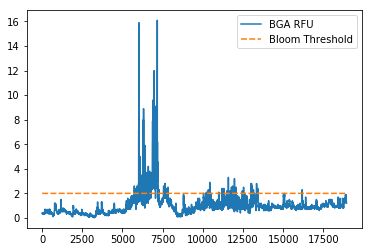

In [13]:
sns.lineplot(data=pd.DataFrame({
    'BGA RFU': train_dfs[0]['BGA-Phycocyanin RFU'].values,
    'Bloom Threshold': np.full(train_dfs[0].count()[0], RFU_THRESHOLD)}))

## Greedy Model

In [14]:
# Sort columns by recall
sorted_columns = lrf.sort_columns_by_recall(train_dfs[0], 
                                            test_dfs[0],
                                            x_columns,
                                            'bloom')

Training model with: Temp C


C:\Users\mccomackjp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Recall: 0.0
Precision 0.0
Confusion Matrix:
 [[12153     0]
 [ 1659     0]]

Training model with: Sp Cond (uS/cm)
Recall: 0.0
Precision 0.0
Confusion Matrix:
 [[12141    12]
 [ 1659     0]]

Training model with: pH (mV)


C:\Users\mccomackjp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Recall: 0.0
Precision 0.0
Confusion Matrix:
 [[12153     0]
 [ 1659     0]]

Training model with: pH


C:\Users\mccomackjp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Recall: 0.0
Precision 0.0
Confusion Matrix:
 [[12153     0]
 [ 1659     0]]

Training model with: Turbidity (NTU)
Recall: 0.007233273056057866
Precision 1.0
Confusion Matrix:
 [[12153     0]
 [ 1647    12]]

Training model with: ODOSat%
Recall: 0.06148282097649186
Precision 0.6938775510204082
Confusion Matrix:
 [[12108    45]
 [ 1557   102]]

Training model with: ODO (mg/L)
Recall: 0.0
Precision 0.0
Confusion Matrix:
 [[12153     0]
 [ 1659     0]]

ODOSat% recall: 0.06148282097649186
Turbidity (NTU) recall: 0.007233273056057866
Temp C recall: 0.0
Sp Cond (uS/cm) recall: 0.0
pH (mV) recall: 0.0
pH recall: 0.0
ODO (mg/L) recall: 0.0


C:\Users\mccomackjp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [15]:
#create greedy model
recall, precision, cm, predictions, predictions_prob, model = lrf.greedy_model(
    train_dfs[0], test_dfs[0], x_columns, 'bloom', sorted_columns)


C:\Users\mccomackjp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Training model with: ['ODOSat%']
Test model recall: 0.06148282097649186
Test model precision: 0.6938775510204082

Updating greedy model

Training model with: ['ODOSat%', 'Turbidity (NTU)']
Test model recall: 0.08921036769138035
Test model precision: 0.6820276497695853

Updating greedy model

Training model with: ['ODOSat%', 'Turbidity (NTU)', 'Temp C']
Test model recall: 0.015069318866787222
Test model precision: 0.3968253968253968

Training model with: ['ODOSat%', 'Turbidity (NTU)', 'Sp Cond (uS/cm)']
Test model recall: 0.0379746835443038
Test model precision: 0.48091603053435117

Training model with: ['ODOSat%', 'Turbidity (NTU)', 'pH (mV)']
Test model recall: 0.081374321880651
Test model precision: 0.5294117647058824

Training model with: ['ODOSat%', 'Turbidity (NTU)', 'pH']
Test model recall: 0.07655213984327909
Test model precision: 0.635

Training model with: ['ODOSat%', 'Turbidity (NTU)', 'ODO (mg/L)']
Test model recall: 0.009644364074743821
Test model precision: 0.3076923076923

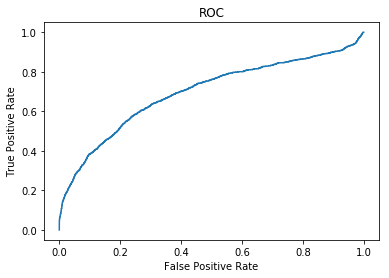

In [24]:
# Print the ROC curve.
predictions = [x[1] for x in predictions_prob]
lrf.roc_plot(test_dfs[0][['bloom']].values, predictions)

## Cross training sites for comparison

In [26]:
avg_recall = 0
avg_precision = 0
train_index = 0
test_index = 0
for train in train_dfs:
    for test in test_dfs:
        print("Training on:", train_files[train_index])
        print("Testing on:", test_files[test_index])
        recall, precision, cm, _, _, _ = lrf.train_model(
            train, test, x_columns, 'bloom')
        avg_recall += recall
        avg_precision += precision
        print("Recall:", recall)
        print("Precision", precision)
        print("Confusion Matrix:\n", cm)
        print()
        test_index = (test_index + 1) % len(test_files)
    train_index += 1
num_models = len(train_dfs) * len(test_dfs)
print("Average Recall:", avg_recall / num_models)
print("Average Precision:", avg_precision / num_models)

Training on: ../../data/cleaned/utah_2017_vineyard.csv
Testing on: ../../data/cleaned/utah_2018_vineyard.csv
Recall: 0.027124773960216998
Precision 0.24324324324324326
Confusion Matrix:
 [[12013   140]
 [ 1614    45]]

Training on: ../../data/cleaned/utah_2017_vineyard.csv
Testing on: ../../data/cleaned/utah_2018_marina.csv
Recall: 0.0118137595552467
Precision 0.9807692307692307
Confusion Matrix:
 [[15169     1]
 [ 4266    51]]

Training on: ../../data/cleaned/utah_2017_vineyard.csv
Testing on: ../../data/cleaned/utah_2018_bird.csv
Recall: 0.03356528857961523
Precision 0.5857142857142857
Confusion Matrix:
 [[14482   116]
 [ 4722   164]]

Training on: ../../data/cleaned/utah_2017_marina.csv
Testing on: ../../data/cleaned/utah_2018_vineyard.csv
Recall: 0.02531645569620253
Precision 0.25766871165644173
Confusion Matrix:
 [[12032   121]
 [ 1617    42]]

Training on: ../../data/cleaned/utah_2017_marina.csv
Testing on: ../../data/cleaned/utah_2018_marina.csv
Recall: 0.006254343293954135
Prec